In [1]:
%matplotlib inline

## RBF Kernel Principal Component Analysis

Implementation of RBF Kernel Principal Component Analysis for non-linear dimensionality reduction

> from mlxtend.feature_extraction import RBFKernelPCA

## Overview

Most machine learning algorithms have been developed and statistically validated for linearly separable data. Popular examples are linear classifiers like Support Vector Machines (SVMs) or the (standard) Principal Component Analysis (PCA) for dimensionality reduction. However, most real world data requires nonlinear methods in order to perform tasks that involve the analysis and discovery of patterns successfully.

The focus of this overview is to briefly introduce the idea of kernel methods and to implement a Gaussian radius basis function (RBF) kernel that is used to perform nonlinear dimensionality reduction via BF kernel principal component analysis (kPCA).

### Principal Component Analysis

The main purpose of principal component analysis (PCA) is the analysis of data to identify patterns that represent the data “well.” The principal components can be understood as new axes of the dataset that maximize the variance along those axes (the eigenvectors of the covariance matrix). In other words, PCA aims to find the axes with maximum variances along which the data is most spread.

![](./RBFKernelPCA_files/pca_1.png)

For more details, please see the related article on [`mlxtend.feature_extraction.PrincipalComponentAnalysis`](./PrincipalComponentAnalysis.md).

### Nonlinear dimensionality reduction

The “classic” PCA approach described above is a linear projection technique that works well if the data is linearly separable. However, in the case of linearly inseparable data, a nonlinear technique is required if the task is to reduce the dimensionality of a dataset.

![](./RBFKernelPCA_files/linear_vs_nonlinear.png)

### Kernel functions and the kernel trick



The basic idea to deal with linearly inseparable data is to project it onto a higher dimensional space where it becomes linearly separable. Let us call this nonlinear mapping function $\phi$ so that the mapping of a sample $\mathbf{x}$ can be written as $\mathbf{x} \rightarrow \phi (\mathbf{x})$, which is called "kernel function."

Now, the term "kernel" describes a function that calculates the dot product of the images of the samples $\mathbf{x}$ under $\phi$.

$$\kappa(\mathbf{x_i, x_j}) =  \phi (\mathbf{x_i}) \phi (\mathbf{x_j})^T$$

More details about the derivation of this equation are provided in this excellent review article by Quan Wang: [Kernel Principal Component Analysis and its Applications in Face Recognition and Active Shape Models](http://arxiv.org/abs/1207.3538).[[1](#References)]

In other words, the function $\phi$ maps the original d-dimensional features into a larger, k-dimensional feature space by creating nononlinear combinations of the original features. For example, if $\mathbf{x}$ consists of 2 features:

$$
\mathbf{x} = \big[x_1 \quad x_2\big]^T \quad \quad \mathbf{x} \in I\!R^d
$$

$$
\Downarrow \phi
$$

$$
\mathbf{x}' = \big[x_1 \quad x_2 \quad x_1 x_2 \quad x_{1}^2 \quad x_1 x_{2}^3 \quad \dots \big]^T \quad \quad \mathbf{x} \in I\!R^k (k >> d)
$$


Often, the mathematical definition of the RBF kernel is written and implemented as

$$
\kappa(\mathbf{x_i, x_j}) = exp\bigg(- \gamma \; \lVert\mathbf{x_i - x_j }\rVert^{2}_{2} \bigg)
$$

where $\textstyle\gamma = \tfrac{1}{2\sigma^2}$ is a free parameter that is to be optimized.


### Gaussian radial basis function (RBF) Kernel PCA



In the linear PCA approach, we are interested in the principal components that maximize the variance in the dataset. This is done by extracting the eigenvectors (principle components) that correspond to the largest eigenvalues based on the covariance matrix:

$$\text{Cov} = \frac{1}{N} \sum_{i=1}^{N} \mathbf{x_i} \mathbf{x_i}^T$$

Bernhard Scholkopf ([Kernel Principal Component Analysis](http://dl.acm.org/citation.cfm?id=299113) [[2](#References)]) generalized this approach for data that was mapped onto the higher dimensional space via a kernel function:

$$\text{Cov} = \frac{1}{N} \sum_{i=1}^{N} \phi(\mathbf{x_i}) \phi(\mathbf{x_i})^T$$

However, in practice the the covariance matrix in the higher dimensional space is not calculated explicitly (kernel trick). Therefore, the implementation of RBF kernel PCA does not yield the principal component axes (in contrast to the standard PCA), but the obtained eigenvectors can be understood as projections of the data onto the principal components.


### RBF kernel PCA step-by-step


#### 1. Computation of the kernel (similarity) matrix.

In this first step, we need to calculate

$$\kappa(\mathbf{x_i, x_j}) = exp\bigg(- \gamma \; \lVert\mathbf{x_i - x_j }\rVert^{2}_{2} \bigg)$$

for every pair of points. E.g., if we have a dataset of 100 samples, this step would result in a symmetric 100x100 kernel matrix.

#### 2. Eigendecomposition of the kernel matrix.

Since it is not guaranteed that the kernel matrix is centered, we can apply the following equation to do so:

$$K' = K - \mathbf{1_N} K - K \mathbf{1_N} + \mathbf{1_N} K \mathbf{1_N}$$

where $\mathbf{1_N}$ is (like the kernel matrix) a $N\times N$ matrix with all values equal to $\frac{1}{N}$. [[3](#References)]

Now, we have to obtain the eigenvectors of the centered kernel matrix that correspond to the largest eigenvalues. Those eigenvectors are the data points already projected onto the respective principal components.
    

### Projecting new data

So far, so good, in the sections above, we have been projecting an dataset onto a new feature subspace. However, in a real application, we are usually interested in mapping new data points onto the same new feature subspace (e.g., if are working with a training and a test dataset in pattern classification tasks).

Remember, when we computed the eigenvectors $\mathbf{\alpha}$ of the centered kernel matrix, those values were actually already the projected datapoints onto the principal component axis $\mathbf{g}$.

If we want to project a new data point $\mathbf{x}$ onto this principal component axis, we'd need to compute $\phi(\mathbf{x})^T  \mathbf{g}$.

Fortunately, also here, we don't have to compute $\phi(\mathbf{x})^T  \mathbf{g}$ explicitely but use the kernel trick to calculate the RBF kernel between the new data point and every data point $j$ in the training dataset:

$$\phi(\mathbf{x})^T  \mathbf{g}  = \sum_j \alpha_{i} \; \phi(\mathbf{x}) \; \phi(\mathbf{x_j})^T$$

$$=  \sum_j \alpha_{i} \; \kappa(\mathbf{x}, \mathbf{x_j})$$


and the eigenvectors $\alpha$ and eigenvalues $\lambda$ of the Kernel matrix $\mathbf{K}$ satisfy the equation
$\mathbf{K} \alpha = \lambda \alpha$, we just need to normalize the eigenvector by the corresponding eigenvalue.

### References


[1] Q. Wang. [Kernel principal component analysis and its applications in face recognition and active shape models](http://arxiv.org/abs/1207.3538). CoRR, abs/1207.3538, 2012.

[2] B. Scholkopf, A. Smola, and K.-R. Muller. [Kernel principal component analysis](http://citeseerx.ist.psu.edu/viewdoc/summary?doi=10.1.1.128.7613). pages 583–588, 1997.

[3] B. Scholkopf, A. Smola, and K.-R. Muller. [Nonlinear component analysis as a kernel eigenvalue problem](http://www.mitpressjournals.org/doi/abs/10.1162/089976698300017467#.VBh9QkuCFHg). Neural computation, 10(5):1299–1319, 1998.

## Example 1 - Half-moon shapes

We will start with a simple example of 2 half-moon shapes generated by the `make_moons` function from scikit-learn.

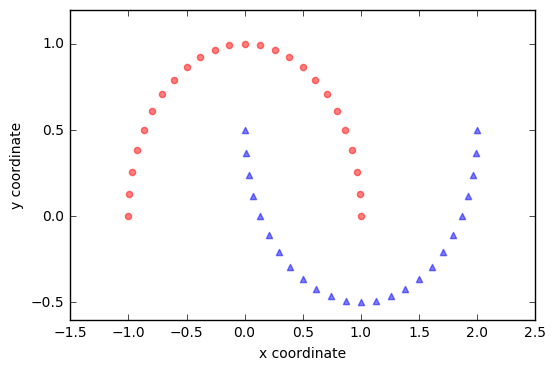

In [2]:
import matplotlib.pyplot as plt
from sklearn.datasets import make_moons

X, y = make_moons(n_samples=50, random_state=1)

plt.scatter(X[y==0, 0], X[y==0, 1], 
            color='red', marker='o', alpha=0.5)
plt.scatter(X[y==1, 0], X[y==1, 1], 
            color='blue', marker='^', alpha=0.5)
plt.ylabel('y coordinate')
plt.xlabel('x coordinate')

plt.show()

Since the two half-moon shapes are linearly inseparable, we expect that the “classic” PCA will fail to give us a “good” representation of the data in 1D space. Let us use `PCA` class to perform the dimensionality reduction.

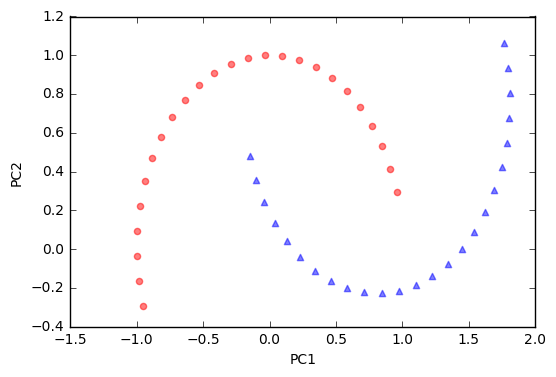

In [3]:
from mlxtend.feature_extraction import PrincipalComponentAnalysis as PCA

pca = PCA(n_components=2)
X_pca = pca.fit(X).transform(X)

plt.scatter(X_pca[y==0, 0], X_pca[y==0, 1], 
            color='red', marker='o', alpha=0.5)
plt.scatter(X_pca[y==1, 0], X_pca[y==1, 1], 
            color='blue', marker='^', alpha=0.5)

plt.xlabel('PC1')
plt.ylabel('PC2')
plt.show()

As we can see, the resulting principal components do not yield a subspace where the data is linearly separated well. Note that PCA is a unsupervised method and does not “consider” class labels in order to maximize the variance in contrast to Linear Discriminant Analysis. Here, the colors blue and red are just added for visualization purposes to indicate the degree of separation.

Next, we will perform dimensionality reduction via RBF kernel PCA on our half-moon data. The choice of $\gamma$
depends on the dataset and can be obtained via hyperparameter tuning techniques like Grid Search. Hyperparameter tuning is a broad topic itself, and here I will just use a $\gamma$-value that I found to produce “good” results.

In [4]:
from mlxtend.data import iris_data
from mlxtend.preprocessing import standardize
from mlxtend.feature_extraction import RBFKernelPCA as KPCA

kpca = KPCA(gamma=15.0, n_components=2)
kpca.fit(X)
X_kpca = kpca.X_projected_

Please note that the components of kernel methods such as RBF kernel PCA already represent the projected data points (in contrast to PCA, where the component axis are the "top k" eigenvectors thar are used to contruct a projection matrix, which is then used to transform the training samples). Thus, the projected training set is available after fitting via the `.X_projected_` attribute.

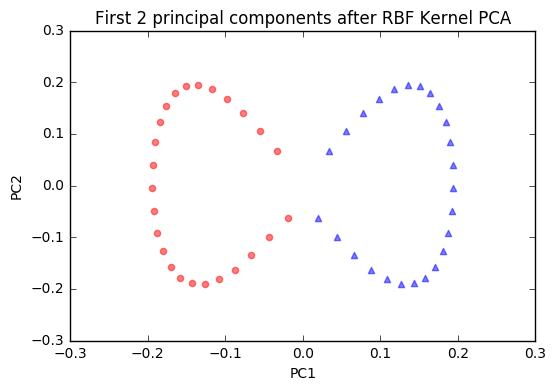

In [5]:
plt.scatter(X_kpca[y==0, 0], X_kpca[y==0, 1], 
            color='red', marker='o', alpha=0.5)
plt.scatter(X_kpca[y==1, 0], X_kpca[y==1, 1], 
            color='blue', marker='^', alpha=0.5)

plt.title('First 2 principal components after RBF Kernel PCA')
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.show()

The new feature space is linearly separable now. Since we are often interested in dimensionality reduction, let's have a look at the first component only.

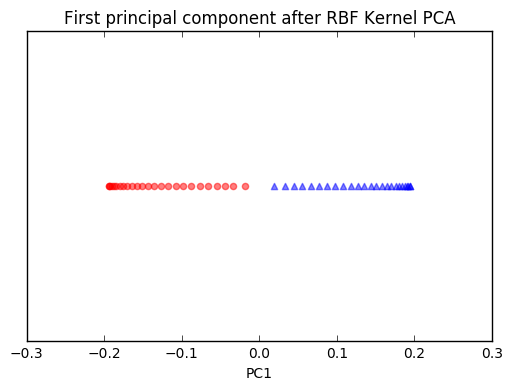

In [6]:
import numpy as np

plt.scatter(X_kpca[y==0, 0], np.zeros((25, 1)), 
            color='red', marker='o', alpha=0.5)
plt.scatter(X_kpca[y==1, 0], np.zeros((25, 1)), 
            color='blue', marker='^', alpha=0.5)

plt.title('First principal component after RBF Kernel PCA')
plt.xlabel('PC1')
plt.yticks([])
plt.show()

We can clearly see that the projection via RBF kernel PCA yielded a subspace where the classes are separated well. Such a subspace can then be used as input for generalized linear classification models, e.g.,  logistic regression.

#### Projecting new data

Finally, via the transform method, we can project new data onto the new component axes.

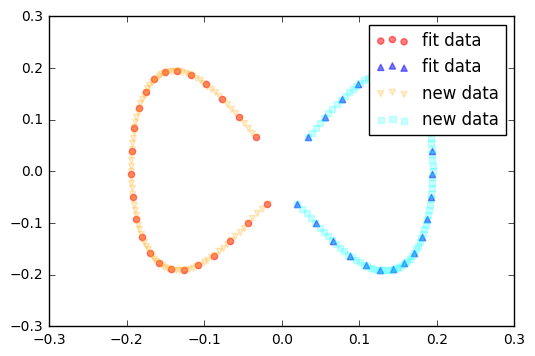

In [7]:
import matplotlib.pyplot as plt
from sklearn.datasets import make_moons

X2, y2 = make_moons(n_samples=200, random_state=5)
X2_kpca = kpca.transform(X2)

plt.scatter(X_kpca[y==0, 0], X_kpca[y==0, 1], 
            color='red', marker='o', alpha=0.5, label='fit data')
plt.scatter(X_kpca[y==1, 0], X_kpca[y==1, 1], 
            color='blue', marker='^', alpha=0.5, label='fit data')

plt.scatter(X2_kpca[y2==0, 0], X2_kpca[y2==0, 1], 
            color='orange', marker='v', 
            alpha=0.2, label='new data')
plt.scatter(X2_kpca[y2==1, 0], X2_kpca[y2==1, 1], 
            color='cyan', marker='s', 
            alpha=0.2, label='new data')

plt.legend()
plt.show()

## Example 2 - Concentric circles

Following the concepts explained in example 1, let's have a look at another classic case: 2 concentric circles with random noise produced by scikit-learn’s `make_circles`.

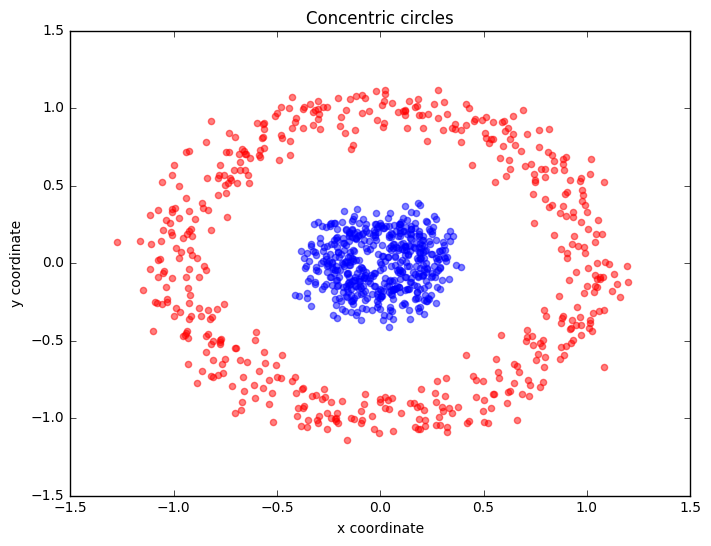

In [8]:
from sklearn.datasets import make_circles

X, y = make_circles(n_samples=1000, random_state=123, 
                    noise=0.1, factor=0.2)

plt.figure(figsize=(8,6))

plt.scatter(X[y==0, 0], X[y==0, 1], color='red', alpha=0.5)
plt.scatter(X[y==1, 0], X[y==1, 1], color='blue', alpha=0.5)
plt.title('Concentric circles')
plt.ylabel('y coordinate')
plt.xlabel('x coordinate')
plt.show()

In [9]:
from mlxtend.data import iris_data
from mlxtend.preprocessing import standardize
from mlxtend.feature_extraction import RBFKernelPCA as KPCA

kpca = KPCA(gamma=15.0, n_components=2)
kpca.fit(X)
X_kpca = kpca.X_projected_

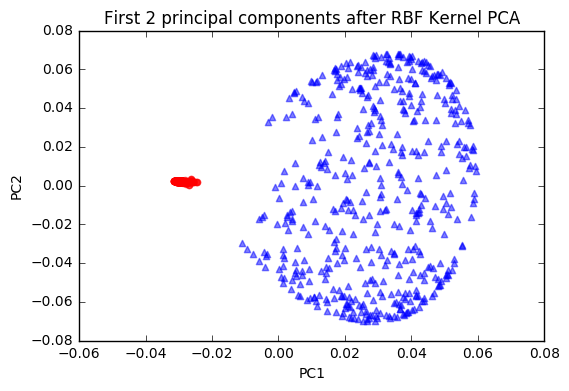

In [10]:
plt.scatter(X_kpca[y==0, 0], X_kpca[y==0, 1], 
            color='red', marker='o', alpha=0.5)
plt.scatter(X_kpca[y==1, 0], X_kpca[y==1, 1], 
            color='blue', marker='^', alpha=0.5)

plt.title('First 2 principal components after RBF Kernel PCA')
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.show()

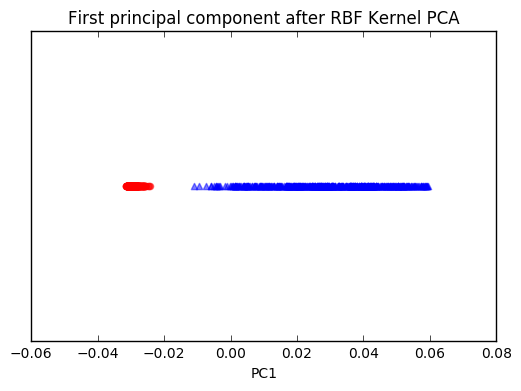

In [11]:
plt.scatter(X_kpca[y==0, 0], np.zeros((500, 1)), 
            color='red', marker='o', alpha=0.5)
plt.scatter(X_kpca[y==1, 0], np.zeros((500, 1)), 
            color='blue', marker='^', alpha=0.5)

plt.title('First principal component after RBF Kernel PCA')
plt.xlabel('PC1')
plt.yticks([])
plt.show()

## API

In [1]:
with open('../../api_modules/mlxtend.feature_extraction/RBFKernelPCA.md', 'r') as f:
    s = f.read()
print(s)

## RBFKernelPCA

*RBFKernelPCA(gamma=15.0, n_components=None, copy_X=True)*

RBF Kernel Principal Component Analysis for dimensionality reduction.

**Parameters**

- `gamma` : float (default: 15.0)

    Free parameter (coefficient) of the RBF kernel.

- `n_components` : int (default: None)

    The number of principal components for transformation.
    Keeps the original dimensions of the dataset if `None`.

- `copy_X` : bool (default: True)

    Copies training data, which is required to compute the projection
    of new data via the transform method. Uses a reference to X if False.

**Attributes**

- `e_vals_` : array-like, shape=[n_features]

    Eigenvalues in sorted order.

- `e_vecs_` : array-like, shape=[n_features]

    Eigenvectors in sorted order.

- `X_projected_` : array-like, shape=[n_samples, n_components]

    Training samples projected along the component axes.

### Methods

<hr>

*fit(X)*

Learn model from training data.

**Parameters**

- `X` : {array-like, sparse mat